In [1]:
from LABNET import Neuron, Net, Lab

In [2]:
import random

In [3]:
dl_big = [
    ['i']
    ,['i']
    ,['i']
    ,['i']
    ,['i']
    ,['i']
    ,['i']
    ,['i'] #0-7 for inputs
    
    ,['fc',[0,1,2]]
    ,['fc',[-2,3,-4]]
    ,['fc',[3,4,5]]
    ,['fc',[3,5,7]]
    ,['fc',[0,7]] #8 - 12 for this layer
    
    ,['fc',[8,10]]
    ,['fc',[9,-11]]
    ,['fc',[12]]
    ,['fc',[-8,-9]] #13 - 16
    
    
    
    ,['o',[-13,14]]
    ,['o',[-14,15,-16]]
    ,['o',[-15,-16]]
    ,['o',[-13,16]]
    
]

In [4]:
nn_big = Net(dl_big)
nn_big.generate_inputs()
nn_big.generate_outputs()
nn_big.tensorize()

self.inputs and self.outputs are now tensors of shape torch.Size([256, 8]) and torch.Size([256, 4]) respectively!


In [5]:
nn_big.outputs

tensor([[False,  True, False, False],
        [False, False,  True, False],
        [False,  True, False, False],
        ...,
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True]])

In [6]:
nn_big.percent_true()

[tensor(0.0938), tensor(0.0781), tensor(0.1562), tensor(0.7500)]

In [7]:
nn_big.input_size

8

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = nn.Linear(nn_big.input_size, 5) ##make these all variables duh
        self.hidden_2 = nn.Linear(5,4)
        self.output = nn.Linear(4, nn_big.output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden_1(x))
        x = self.relu(self.hidden_2(x))
        x = self.output(x)
        return x

In [10]:
model = MyModel()

In [11]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [12]:
input_data = nn_big.inputs.float()
output_data = nn_big.outputs.float()

In [ ]:
##this will be a labnet function.  takes model, 
class Lab:
    def __init__(self, model,num_epochs,samples):
        """
        used in the training loop to record all the weights.  this will do differencing and visualizations
        """
        self.LabParams = {} #holds pretty much everything
        self.LayerNames = []
        
        weight_layers = sum(1 for i in model.named_parameters())
        #self.LabParams = [0]*weight_layers # a list containing the weight tensors
        self.LayerNames = ['']*weight_layers
        ep_list = [num_epochs* samples]

        for idx,t in enumerate(model.named_parameters()):
            name = t[0]
            layer_shape = ep_list + list(t[1].shape) #the shape the lab param should have for each weight matrix
            self.LabParams[name] = torch.zeros(layer_shape)
            self.LayerNames[idx] = name
        
        
    def record(self, model,epoch,data_samples,sample):
        #this has to know which weight layer it is.  i think its always the same order?
        idx = 0
        for i in model.named_parameters():
            #assert i[0] == self.LabParams[idx][0] 
            self.LabParams[i[0]][epoch * data_samples + sample] = i[1]
            idx +=1
    def graph(self,layers_to_graph = None, graph_together = False, diff = False):
        
        if layers_to_graph is None:
            layers_to_graph = lab.LayerNames

        if graph_together:
            fig, ax = plt.subplots()

        for layer_name in layers_to_graph:
        #layer_name = 'hidden_1.weight'


            weights = lab.LabParams[layer_name].detach().numpy()
            shapes =  (weights.shape[0], np.prod(weights.shape[1:])) #flattens all but first (time step)
            weights = weights.reshape(shapes)
            
            if diff:
                weights = np.diff(weights, axis=0)
                shapes = weights.shape
            num_time_steps, num_dimensions = weights.shape

            if not graph_together:
                fig, ax = plt.subplots()

            for i in range(num_dimensions):
                ax.plot(range(num_time_steps), weights[:, i], label=f"Dimension {i+1}")


            ax.set_xlabel('Time Step')
            ax.set_ylabel('Weight Value')
            ax.set_title(layer_name)
            if not graph_together:
                plt.show()

        if graph_together:
            plt.show()
    


In [13]:
# Training loop
samples = input_data.shape[0]
num_epochs = 20
hidden_layer_weights = torch.zeros(num_epochs* samples, 5, 8) #this should be num epochs by hidden size.  
lab = Lab(model,num_epochs,samples)
data = list(zip(input_data, output_data))

for epoch in range(num_epochs):
    
    sample = 0
    
    random.shuffle(data)
    shuffled_inputs, shuffled_outputs = zip(*data)
    
    for inputs, targets in zip(shuffled_inputs, shuffled_outputs):
        inputs = inputs.unsqueeze(0)  
        targets = targets.unsqueeze(0)
    
        output = model(inputs)
    
        loss = criterion(output, targets)

    
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #print or store loss if you wanna
        #loss.item()

        #print(model.hidden_1.weight.shape) ##i also have biases here.  are those interesting??
        hidden_layer_weights[epoch * samples + sample] = model.hidden_1.weight
        lab.record(model,epoch,samples,sample)
        sample += 1
        #print(model.hidden_2.weight)
        #print(model.output.weight)

# After training, you can use the model to make predictions
#test_input = torch.randn(1, 8)  # Single test input with 8 values
#predicted_output = model(test_input)
#print("Predicted output:", predicted_output)

In [14]:
lab

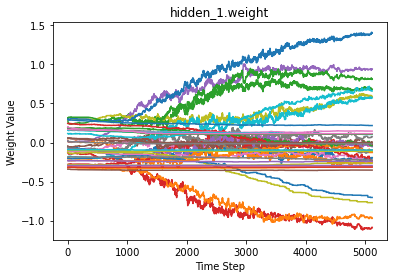

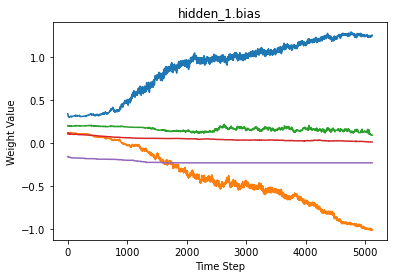

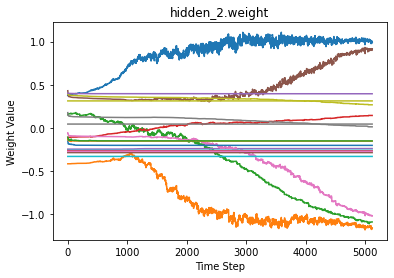

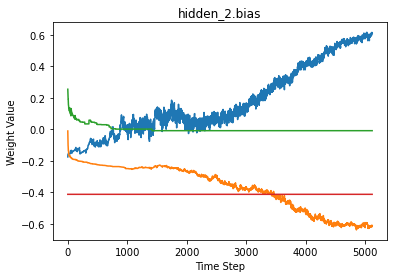

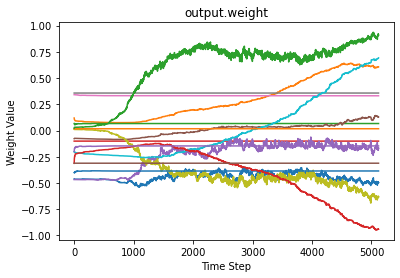

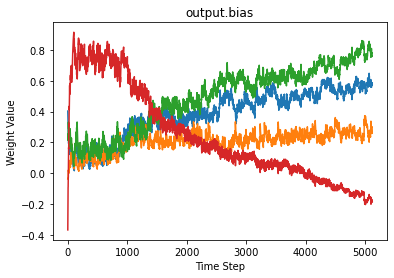

In [20]:
lab.graph(diff = False)

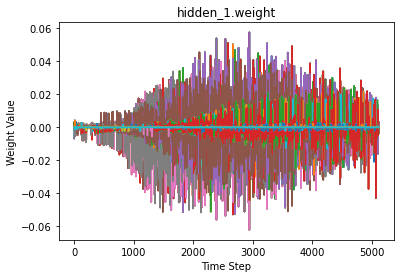

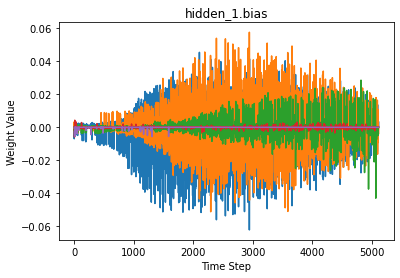

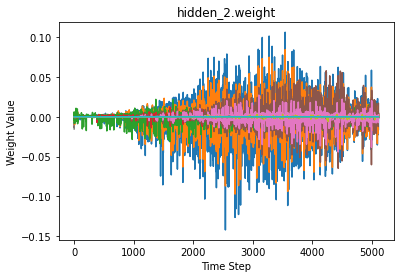

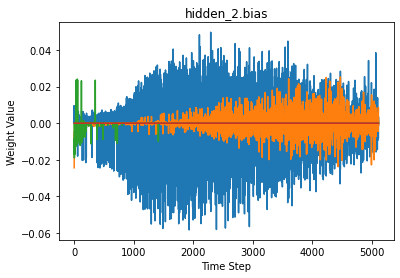

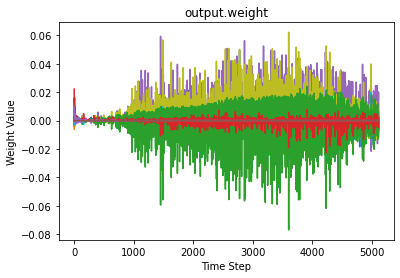

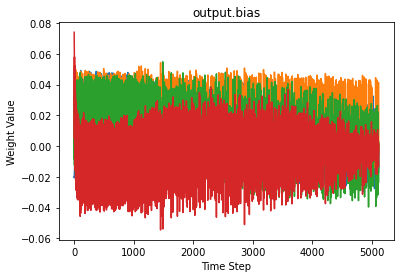

In [21]:
lab.graph(diff = True)

In [19]:

def plot_histogram(tensor, b):
    # Convert tensor to NumPy array
    tensor_np = tensor.numpy()

    # Calculate histogram using NumPy
    hist, bins = np.histogram(tensor_np, bins=b)

    # Plot histogram
    plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]), align='edge')

    # Add labels and title
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.title('Histogram')

    # Show the plot
    plt.show()

In [ ]:
differences = (hidden_layer_weights[-1] - hidden_layer_weights[0]).flatten().detach()

In [ ]:
plot_histogram(differences, b=10)

In [ ]:
plot_histogram(hidden_layer_weights[-1].detach(), b=10)